In [1]:
import pandas as pd
df = pd.read_csv("titanic/train.csv")

In [2]:
# Start with some sample rows
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
471,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
743,744,0,3,"McNamee, Mr. Neal",male,24.0,1,0,376566,16.1000,NaN,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
749,750,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


<Axes: xlabel='Sex'>

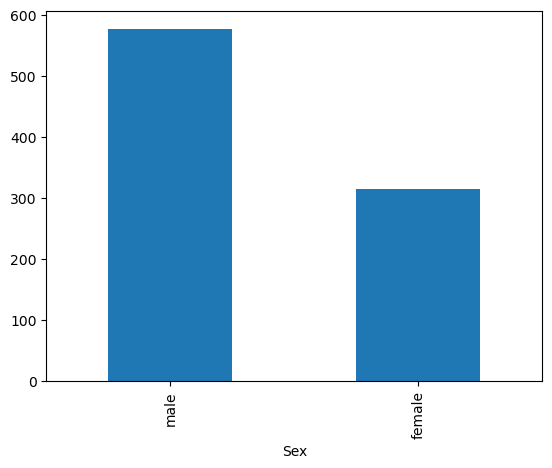

In [3]:
# Distribution of sex
df.Sex.value_counts().plot(kind='bar')

<Axes: >

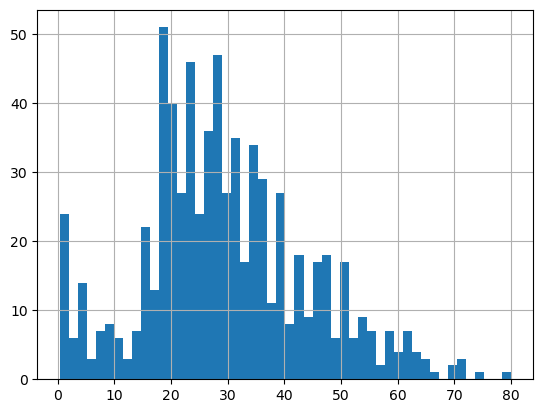

In [4]:
# Age distribution
df.Age.hist(bins=50)

<Axes: >

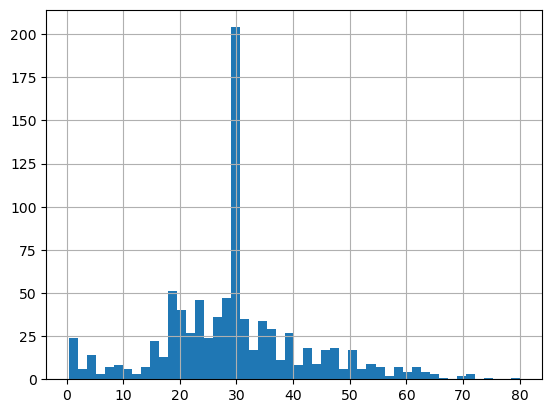

In [5]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df.Age.hist(bins=50)

<Axes: >

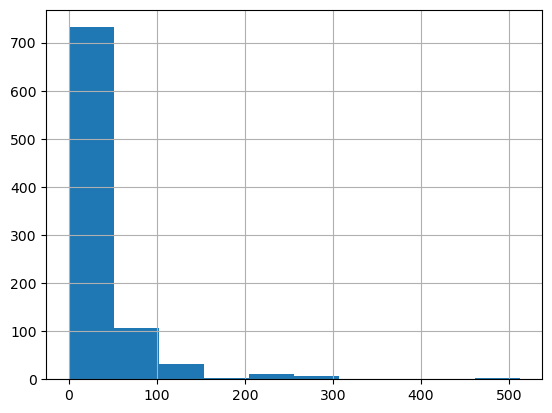

In [6]:
# Fare price distribution
df.Fare.hist()

In [7]:
df['PassengerType'] = df.Sex
df.loc[df['Age'] < 18, 'PassengerType'] = 'child'
df.loc[df['Age'] < 2, 'PassengerType'] = 'baby'

In [8]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerType
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,29.699118,0,0,370370,7.7500,NaN,Q,female
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.000000,1,0,350046,7.8542,NaN,S,female
606,607,0,3,"Karaic, Mr. Milan",male,30.000000,0,0,349246,7.8958,NaN,S,male
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.000000,1,0,28134,11.5000,NaN,S,male
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,29.699118,1,0,2689,14.4583,NaN,C,female
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.000000,1,1,C.A. 37671,15.9000,NaN,S,child
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.000000,0,0,345765,9.0000,NaN,S,male
409,410,0,3,"Lefebre, Miss. Ida",female,29.699118,3,1,4133,25.4667,NaN,S,female
262,263,0,1,"Taussig, Mr. Emil",male,52.000000,1,1,110413,79.6500,E67,S,male
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.000000,0,0,34218,10.5000,E101,S,female


In [9]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<Axes: >

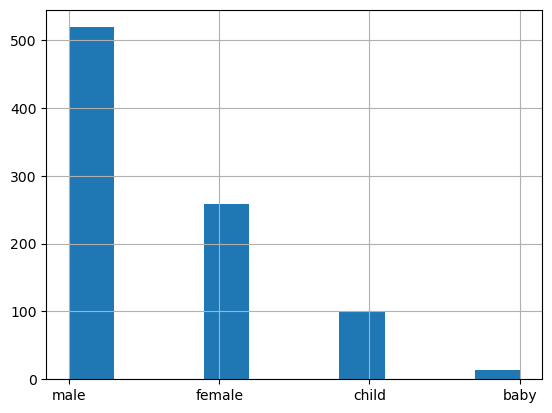

In [11]:
df.PassengerType.hist()

In [12]:
df.PassengerType.value_counts()

PassengerType
male      519
female    259
child      99
baby       14
Name: count, dtype: int64

In [13]:
df.Age.mean()

29.69911764705882

In [14]:
# Let us make family status analysis
# We will use only data from dataset, not speculate on second name
# SibSp Number of siblings/spouses aboard the Titanic
# Parch Number of parents/children aboard the Titanic

df['FamilySize'] = df.SibSp + df.Parch + 1 # Person itself
df.loc[df['FamilySize'] > 1, 'FamilyStatus'] = 'with family'
df.loc[df['FamilySize'] == 1, 'FamilyStatus'] = 'without family'
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerType,FamilySize,FamilyStatus
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.000000,0,2,2650,15.2458,NaN,C,female,3,with family
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.000000,0,0,C.A. 29566,10.5000,NaN,S,male,1,without family
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.000000,0,0,PC 17476,26.2875,E24,S,male,1,without family
475,476,0,1,"Clifford, Mr. George Quincy",male,29.699118,0,0,110465,52.0000,A14,S,male,1,without family
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.000000,0,0,349205,7.8958,NaN,S,male,1,without family
735,736,0,3,"Williams, Mr. Leslie",male,28.500000,0,0,54636,16.1000,NaN,S,male,1,without family
721,722,0,3,"Jensen, Mr. Svend Lauritz",male,17.000000,1,0,350048,7.0542,NaN,S,child,2,with family
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.000000,0,1,24160,211.3375,B5,S,child,2,with family
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,29.699118,0,0,330919,7.8292,NaN,Q,female,1,without family
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.000000,1,0,3101267,6.4958,NaN,S,male,2,with family


<Axes: >

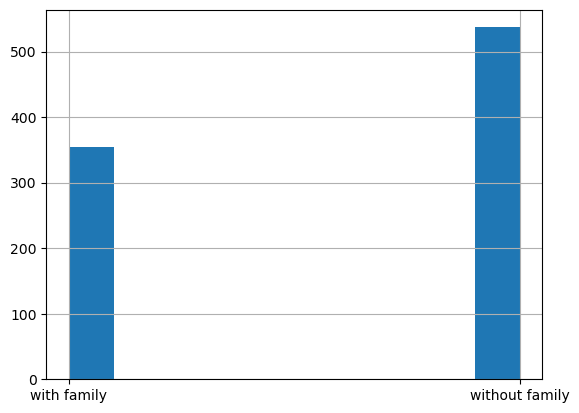

In [15]:
df.FamilyStatus.hist()

array([<Axes: title={'center': 'C'}>, <Axes: title={'center': 'Q'}>,
       <Axes: title={'center': 'S'}>], dtype=object)

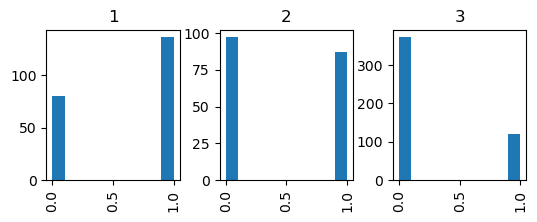

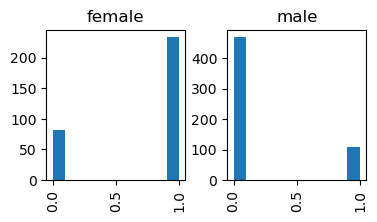

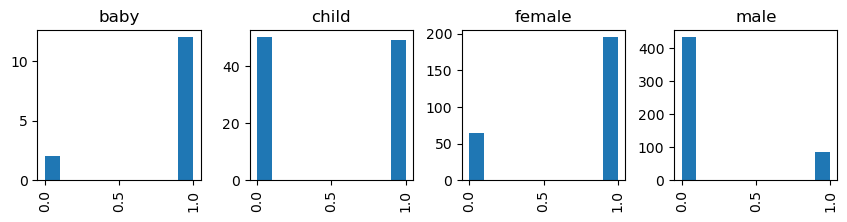

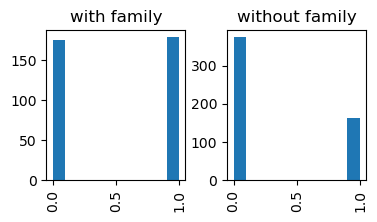

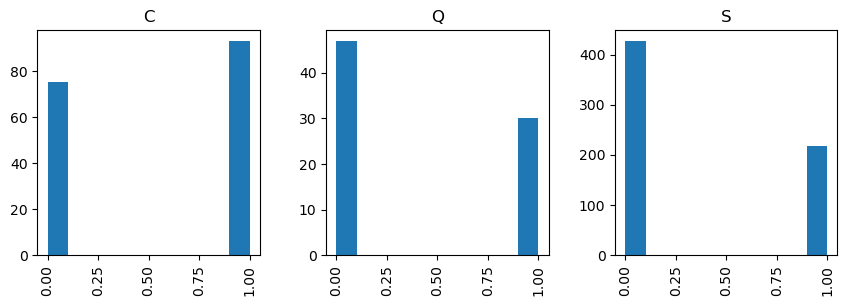

In [16]:
df.hist("Survived", by="Pclass", grid="False", layout=[1,3], figsize=[6,2])
df.hist("Survived", by="Sex",figsize = [4,2])
df.hist("Survived", by="PassengerType", layout=[1,4], figsize = [10,2])
df.hist("Survived", by="FamilyStatus", figsize = [4,2])
df.hist("Survived", by="Embarked", layout=[1,3],figsize = [10,3])